## Outlier Removal Using Percentile

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data  = pd.read_csv("./weight-height(1).csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\moham\AppData\Local\Temp\ipykernel_15184\2321737458.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

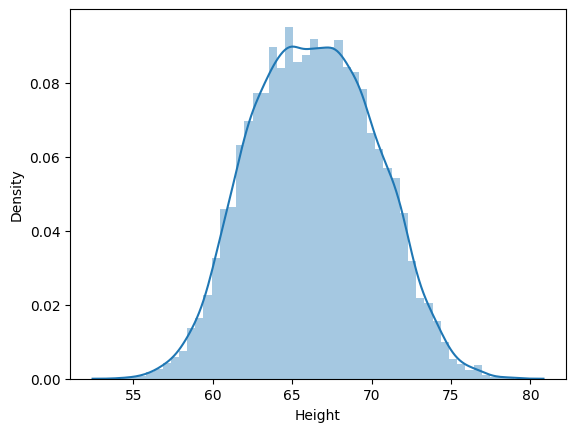

In [27]:
# sns.displot(data['Height'])
sns.distplot(data['Height'])

<Axes: ylabel='Height'>

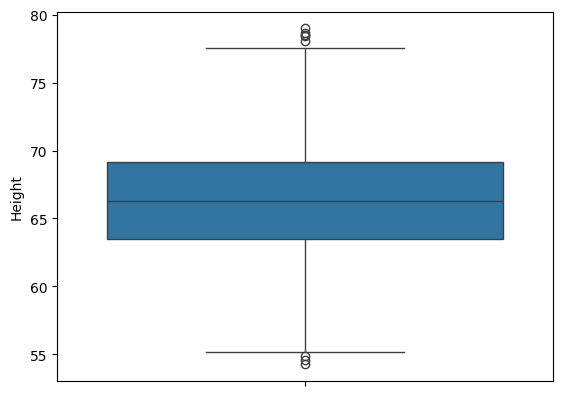

In [28]:
sns.boxplot(data['Height'])

In [29]:
mean = data['Height'].mean()
std = data['Height'].std()
mean,std

(66.36755975482124, 3.8475281207732293)

In [30]:
min_val = mean - 3*std
max_val = mean + 3*std

In [31]:
data[(data['Height'] > max_val) | (data['Height']<min_val)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [32]:
data[(data['Height'] < max_val) & (data['Height']>min_val)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [33]:
data['z_score'] = (data['Height']-data['Height'].mean())/data['Height'].std()

In [34]:
data.head()

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [35]:
data[(data['z_score']>3) | (data['z_score'] < -3)]

,Gender,Height,Weight,z_score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [40]:
data['Height'] = np.where(data['Height']>max_val, max_val, np.where(data['Height']<min_val,min_val, data['Height']))

C:\Users\moham\AppData\Local\Temp\ipykernel_15184\4069851554.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

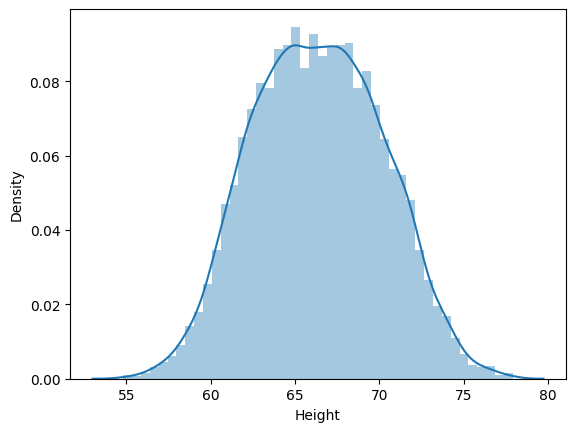

In [41]:
sns.distplot(data['Height'])

<Axes: ylabel='Height'>

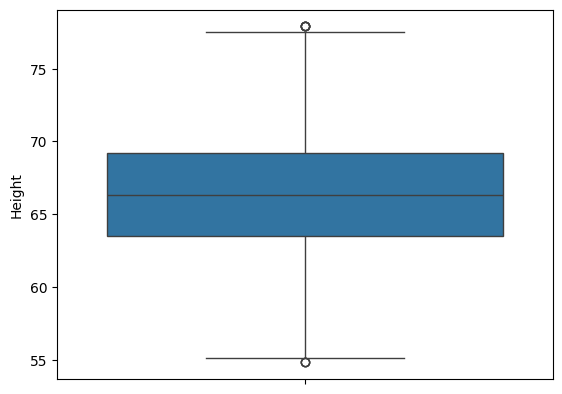

In [42]:
sns.boxplot(data['Height'])

## Using Percentile

In [43]:
min_limit = data['Height'].quantile(0.01)
max_limit = data['Height'].quantile(0.99)

In [44]:
data[(data['Height']>max_limit) | (data['Height']<min_limit)]

,Gender,Height,Weight,z_score
23,Male,75.205974,228.761781,2.297167
190,Male,76.709835,235.035419,2.688031
197,Male,75.944460,231.924749,2.489105
202,Male,75.140821,224.124271,2.280233
215,Male,74.795375,232.635403,2.190449
...,...,...,...,...
9761,Female,56.975279,90.341784,-2.441121
9825,Female,55.979198,85.417534,-2.700009
9895,Female,57.740192,93.652957,-2.242314
9904,Female,57.028857,101.202551,-2.427195


## Trimming

In [47]:
new_data = data[(data['Height']<max_limit) & (data['Height']>min_limit)]

<Axes: ylabel='Height'>

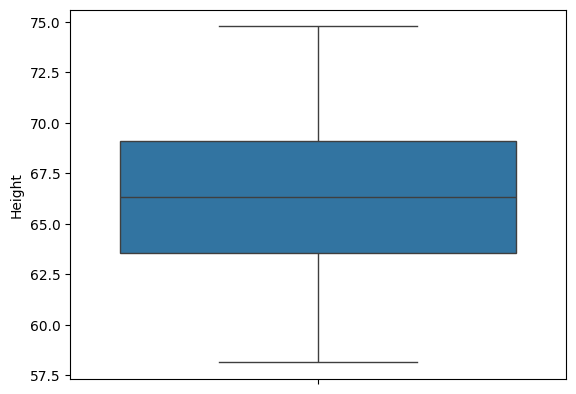

In [48]:
sns.boxplot(new_data['Height'])

#### You can use trim to get new data  without any outlier but it's not a good option to remove outlier

## Capping

In [49]:
data['Height'] = np.where(data['Height']>max_limit, max_limit, np.where(data['Height']<min_limit,min_limit, data['Height']))

<Axes: ylabel='Height'>

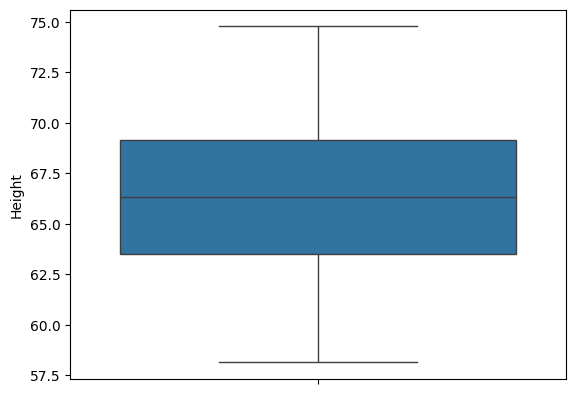

In [50]:
sns.boxplot(data['Height'])